In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
images = train_df.iloc[0:5000,1:]
labels = train_df.iloc[0:5000, :1]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels,train_size=0.8, random_state=0)

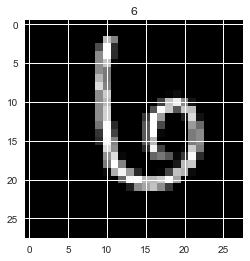

In [12]:
i=1
img=train_images.iloc[i].as_matrix()

img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])


(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

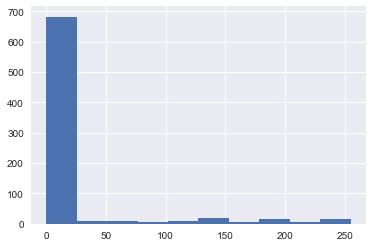

In [13]:
plt.hist(train_images.iloc[i])

In [15]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.10000000000000001

C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\samsung\Anaconda3\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

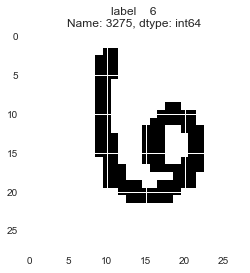

In [22]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

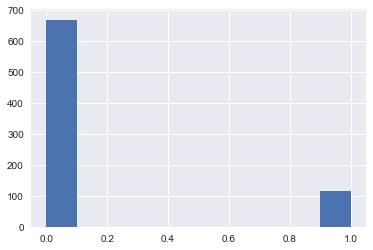

In [23]:
plt.hist(train_images.iloc[i])

In [27]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [29]:
test_df.shape

(28000, 784)

In [30]:
test_df[test_df>0]=1
results=clf.predict(test_df)

In [31]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [32]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)